In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
dataset=pd.read_csv("Bengaluru_House_Data.csv")

In [73]:
dataset.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [74]:
dataset.shape

(13320, 9)

In [75]:
dataset.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [76]:
dataset=dataset.drop(['availability','area_type','society','balcony'],axis=1)
dataset

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [77]:
dataset.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [78]:
dataset=dataset.dropna()


In [79]:
dataset.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [80]:
dataset['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [81]:
dataset['size']=[int(x.split(' ')[0]) for x in dataset['size']  ]

C:\Users\User\AppData\Local\Temp\ipykernel_2680\3274055248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['size']=[int(x.split(' ')[0]) for x in dataset['size']  ]


In [82]:
dataset['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [83]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [84]:
dataset['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [85]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [86]:
dataset[~dataset['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [87]:
def converting_range_to_float(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [88]:
converting_range_to_float('2003')

2003.0

In [89]:
converting_range_to_float('2003-2005')

2004.0

In [90]:
dataset['total_sqft']=dataset['total_sqft'].apply(converting_range_to_float)

C:\Users\User\AppData\Local\Temp\ipykernel_2680\2524667133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['total_sqft']=dataset['total_sqft'].apply(converting_range_to_float)


In [91]:
dataset

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00
13316,Richards Town,4,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00
13318,Padmanabhanagar,4,4689.0,4.0,488.00


In [96]:
dataset_1=dataset.copy()

In [97]:
dataset_1['price_per_sqft']= dataset_1['price']*100000/dataset_1['total_sqft']

In [99]:
dataset_1.sample(5)

,location,size,total_sqft,bath,price,price_per_sqft
2951,Banashankari,3,2600.0,4.0,135.00,5192.307692
6645,Kanakapura,3,1560.0,2.0,62.38,3998.717949
10820,Hoysalanagar,3,840.0,2.0,35.00,4166.666667
473,Whitefield,2,1130.0,2.0,42.16,3730.973451
896,7th Phase JP Nagar,2,1070.0,2.0,42.79,3999.065421


# lets explore locations 
## its is a  catogorical data 

In [100]:
dataset_2=dataset_1.copy()

In [103]:
len(dataset_2['location'].unique())

1304

In [107]:
dataset_2.location=dataset_2.location.apply(lambda x: x.strip())

In [109]:
location_stats= dataset_2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [110]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [111]:
len(location_stats[location_stats<=10])

1052

In [112]:
locations_lessthan_10=location_stats[location_stats<=10]
locations_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [113]:
len(dataset_2.location.unique())

1293

In [114]:
dataset_2.location=dataset_2.location.apply(lambda x: 'other' if x in locations_lessthan_10 else x)

In [117]:
len(dataset_2.location.unique())

242

In [126]:
dataset_2.sample(10)

,location,size,total_sqft,bath,price,price_per_sqft
2111,Electronic City,3,1111.0,3.0,50.00,4500.450045
6339,Yelahanka New Town,1,500.0,2.0,24.00,4800.000000
2801,Whitefield,3,1562.0,3.0,103.00,6594.110115
1647,other,2,1300.0,2.0,65.00,5000.000000
6965,Begur Road,2,1160.0,2.0,36.54,3150.000000
9712,Kudlu Gate,3,1850.0,3.0,120.00,6486.486486
10409,Doddathoguru,3,1208.0,3.0,45.00,3725.165563
4282,Whitefield,4,3000.0,4.0,306.00,10200.000000
718,7th Phase JP Nagar,2,1050.0,2.0,71.00,6761.904762
3512,Jakkur,3,1858.0,3.0,98.30,5290.635091


In [138]:
dataset_3=dataset_2.copy()
dataset_3

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [139]:
dataset_3[dataset_3['total_sqft']/dataset_3['size']<300].head()

,location,size,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000


In [134]:
dataset_3.shape

(13246, 6)

In [140]:
dataset_3=dataset_3[~(dataset_3['total_sqft']/dataset_3['size']<300)]

In [141]:
dataset_3.shape

(12502, 6)

In [142]:
dataset_3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [146]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out =pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [147]:
dataset_4=remove_pps_outliers(dataset_3)
dataset_4

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.00,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.00,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.00,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.00,11983.805668
...,...,...,...,...,...,...
10236,other,2,1353.0,2.0,110.00,8130.081301
10237,other,1,812.0,1.0,26.00,3201.970443
10238,other,3,1440.0,2.0,63.93,4439.583333
10239,other,2,1075.0,2.0,48.00,4465.116279


In [148]:
dataset_4.shape

(10241, 6)

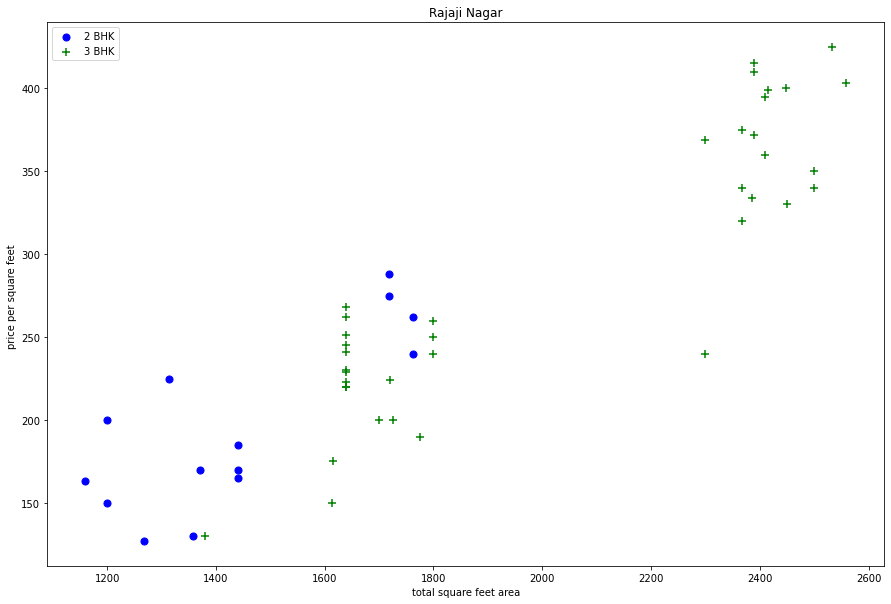

In [165]:
def plot_scatter(df,location):
    bhk2 = df[(df['location']==location) & (df['size']==2)]
    bhk3 = df[(df['location']==location) & (df['size']==3)]
    bhk2.head(5)
    bhk3.head(5)
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker="+",color='green',label='3 BHK' ,s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price per square feet ")
    plt.title(location)
    plt.legend()
plot_scatter(dataset_4,'Rajaji Nagar')

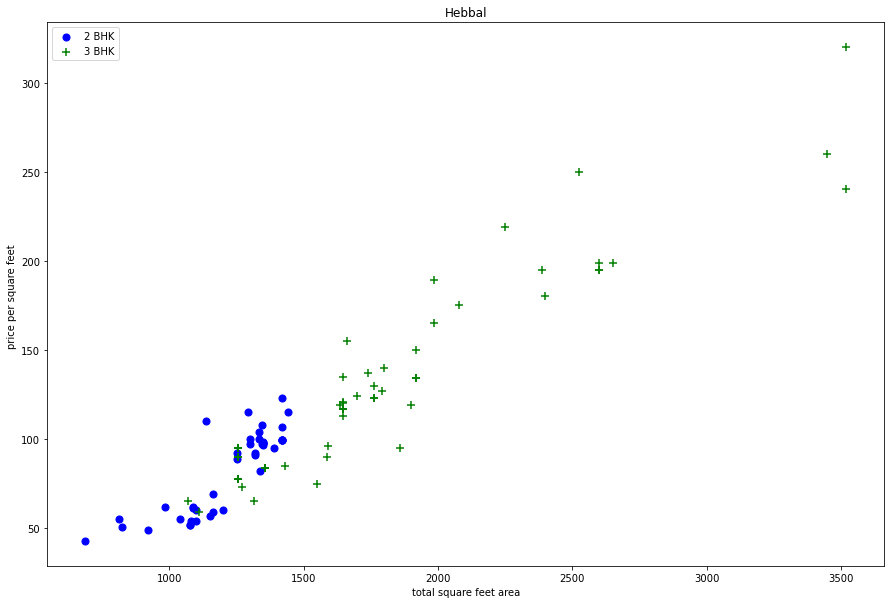

In [168]:
plot_scatter(dataset_4,'Hebbal')
    

In [170]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
dataset_5=remove_bhk_outliers(dataset_4)

In [171]:
dataset_5.shape

(7329, 6)

In [172]:
dataset_5.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2.0,148.0,11983.805668


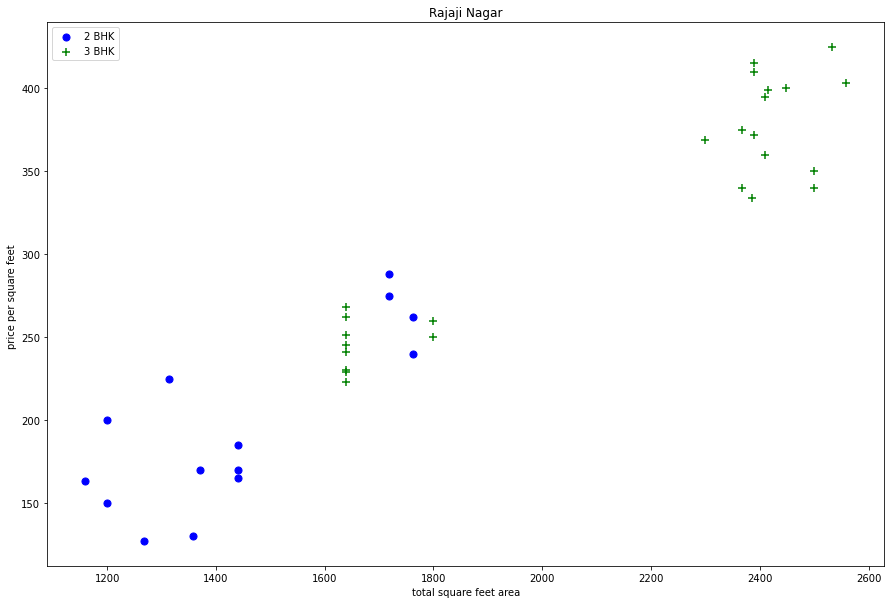

In [174]:
plot_scatter(dataset_5,'Rajaji Nagar')

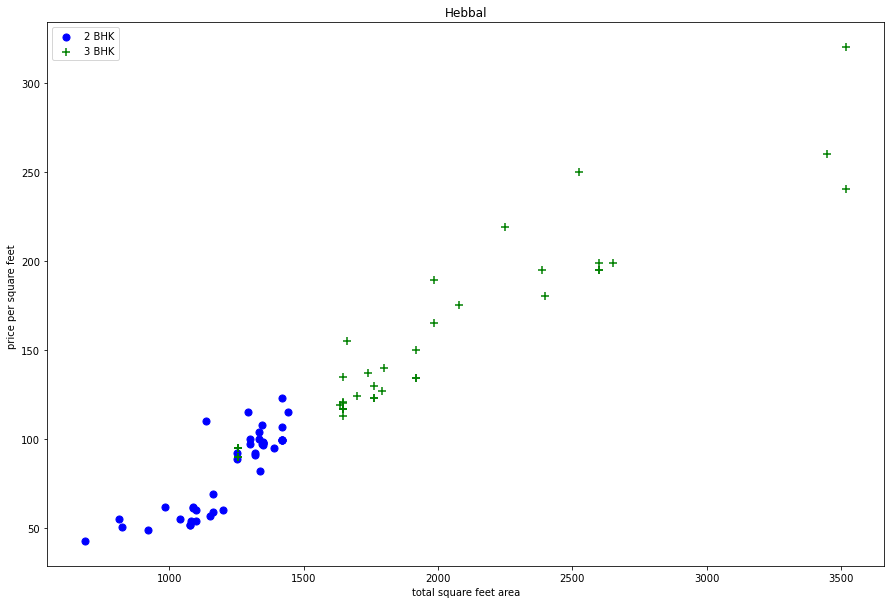

In [175]:
plot_scatter(dataset_5,'Hebbal')

Text(0, 0.5, 'Count')

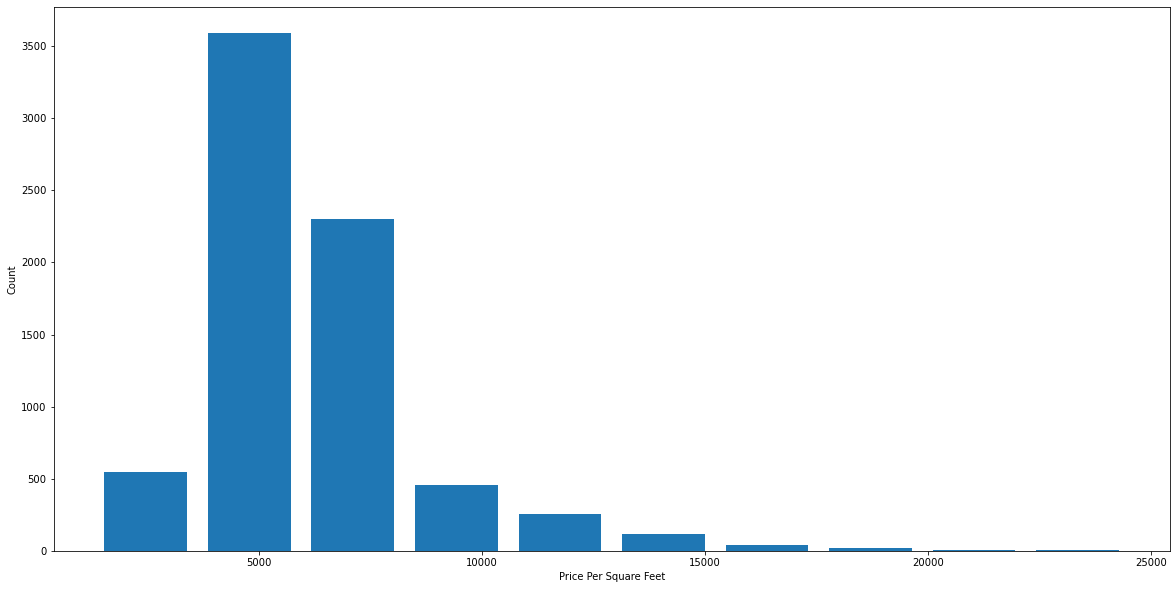

In [177]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataset_5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [179]:
dataset_5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [180]:
dataset_5[dataset_5.bath>10]

,location,size,total_sqft,bath,price,price_per_sqft
5277,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
8486,other,10,12000.0,12.0,525.0,4375.000000
8575,other,16,10000.0,16.0,550.0,5500.000000
9308,other,11,6000.0,12.0,150.0,2500.000000
9639,other,13,5425.0,13.0,275.0,5069.124424


In [181]:
dataset_5['bhk']=dataset_5['size']

In [184]:
dataset_6=dataset_5.copy()

Text(0, 0.5, 'Count')

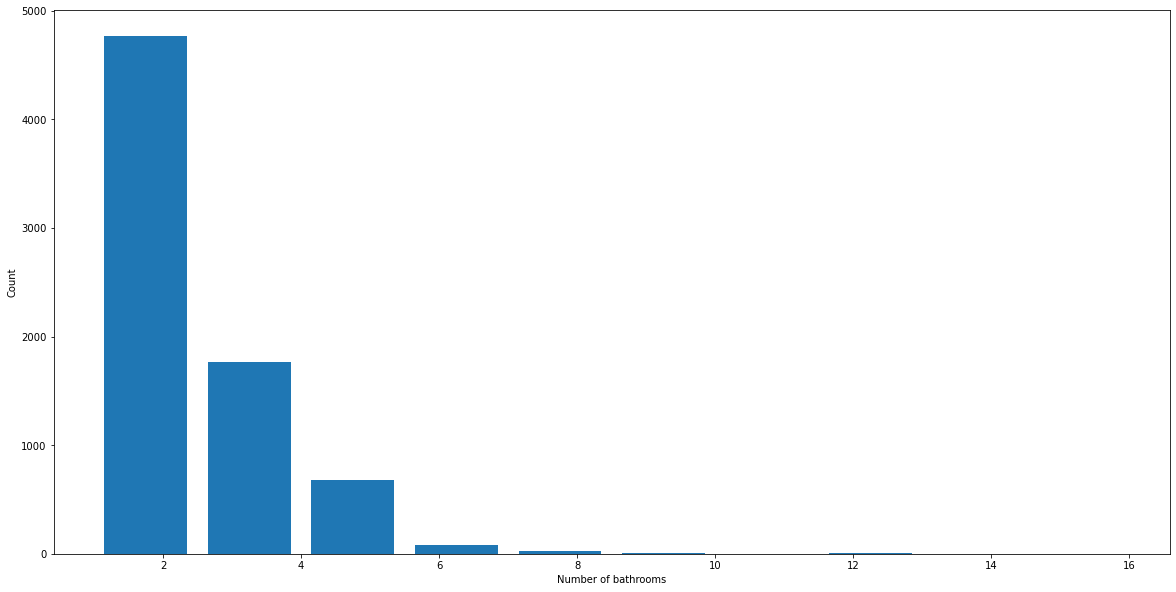

In [185]:
plt.hist(dataset_6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

## remove outliers in bath

In [187]:
dataset_6[dataset_6.bath>10]

,location,size,total_sqft,bath,price,price_per_sqft,bhk
5277,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000,10
8486,other,10,12000.0,12.0,525.0,4375.000000,10
8575,other,16,10000.0,16.0,550.0,5500.000000,16
9308,other,11,6000.0,12.0,150.0,2500.000000,11
9639,other,13,5425.0,13.0,275.0,5069.124424,13


 
It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [188]:
dataset_6[dataset_6.bath>dataset_6.bhk+2]

,location,size,total_sqft,bath,price,price_per_sqft,bhk
1626,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520,4
5238,Nagasandra,4,7000.0,8.0,450.0,6428.571429,4
6711,Thanisandra,3,1806.0,6.0,116.0,6423.034330,3
8411,other,6,11338.0,9.0,1000.0,8819.897689,6


In [189]:
dataset_7 = dataset_6[dataset_6.bath<dataset_6.bhk+2]
dataset_7.shape

(7251, 7)

total bath = total bed + 1 max


In [190]:
dataset_7 = dataset_7.drop(['size','price_per_sqft'],axis='columns')
dataset_7.head(3)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [191]:
dummies = pd.get_dummies(dataset_7.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
dataset_8 = pd.concat([dataset_7,dummies.drop('other',axis='columns')],axis='columns')
dataset_8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
dataset_9 = dataset_8.drop('location',axis='columns')
dataset_9.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
dataset_9.shape

(7251, 245)

# model building

In [195]:
X = dataset_9.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
X.shape

(7251, 244)

In [197]:
y = dataset_9.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [198]:
len(y)

7251

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [217]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [218]:
model.fit(X_train,y_train)


LinearRegression()

In [219]:
model.score(X_test,y_test)

0.8452277697874279

In [220]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [221]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677167738

In [222]:
predict_price('Neeladri Nagar',4000, 12, 10)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


307.7513814652069

In [223]:
predict_price('Whitefield',3453, 4, 5)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


253.00371693067046